Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [394]:
airbnb <- read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [395]:
## creamos la columna Square.Meters
airbnb$Square.Meters <- airbnb$Square.Feet * 0.092903

## eliminnamos ademas la columna Square.Feet, ya que no nos hace falta al tener la nueva en metros cuadrados.
airbnbFiltroCol <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude', 'Square.Meters')]
head(airbnbFiltroCol)

City   Room.Type       Neighbourhood Accommodates Bathrooms Bedrooms Beds
1 Madrid Entire home/apt               2            1.0       0        1   
2 Madrid Entire home/apt               4            1.0       1        2   
3 Madrid Entire home/apt               4            1.5       1        2   
4 Madrid Entire home/apt Embajadores   2            1.0       1        2   
5 Madrid Entire home/apt Embajadores   5            1.0       2        4   
6 Madrid Entire home/apt La Latina     4            1.0       1        2   
  Price Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
1 50    2               15           96                   40.40745 -3.707995
2 50    2               25           81                   40.40832 -3.705006
3 77    1                0           89                   40.41372 -3.706823
4 50    1               20           93                   40.41126 -3.697305
5 95    4                0           97                   40.41256 -3.701155
6 69    2               18           91                   40.40791 -3.705095
  Square.Meters
1 NA           
2 NA           
3 NA           
4 NA           
5 NA           
6 NA

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [396]:
df_madrid <- subset(airbnbFiltroCol, City == 'Madrid' & Room.Type == 'Entire home/apt' & Neighbourhood != '')
borrarCol <- c('Room.Type', 'City')
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrarCol)]
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [397]:
porcentajeNA <- round(sum(is.na(df_madrid$Square.Meters) / nrow(df_madrid)) * 100 , 2)
paste("El porcentaje de NA en la columna Square.Meters es: ", porcentajeNA)

[1] "El porcentaje de NA en la columna Square.Meters es:  93.8"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [398]:
porcentaje0 <- round(sum(df_madrid$Square.Meters == 0,na.rm=T) / sum(!is.na(df_madrid$Square.Meters)) * 100 , 2)
paste("El porcentaje de 0 es: ", porcentaje0)

[1] "El porcentaje de 0 es:  36.89"

Reemplazar todos los 0m^2 por NA 

In [399]:
df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))
head(df_madrid)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Guests.Included
1 Embajadores    2           1         1         2    50   1              
2 Embajadores    5           1         2         4    95   4              
3 La Latina      4           1         1         2    69   2              
4 Embajadores    4           1         1         2    57   2              
5 La Latina      2           1         1         1    59   1              
6 La Latina     14           2         3        14   120   2              
  Extra.People Review.Scores.Rating Latitude Longitude Square.Meters
1 20           93                   40.41126 -3.697305 NA           
2  0           97                   40.41256 -3.701155 NA           
3 18           91                   40.40791 -3.705095 NA           
4  8           98                   40.41162 -3.703281 NA           
5  0           95                   40.40734 -3.707019 NA           
6 18           92                   40.40908 -3.704744 NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


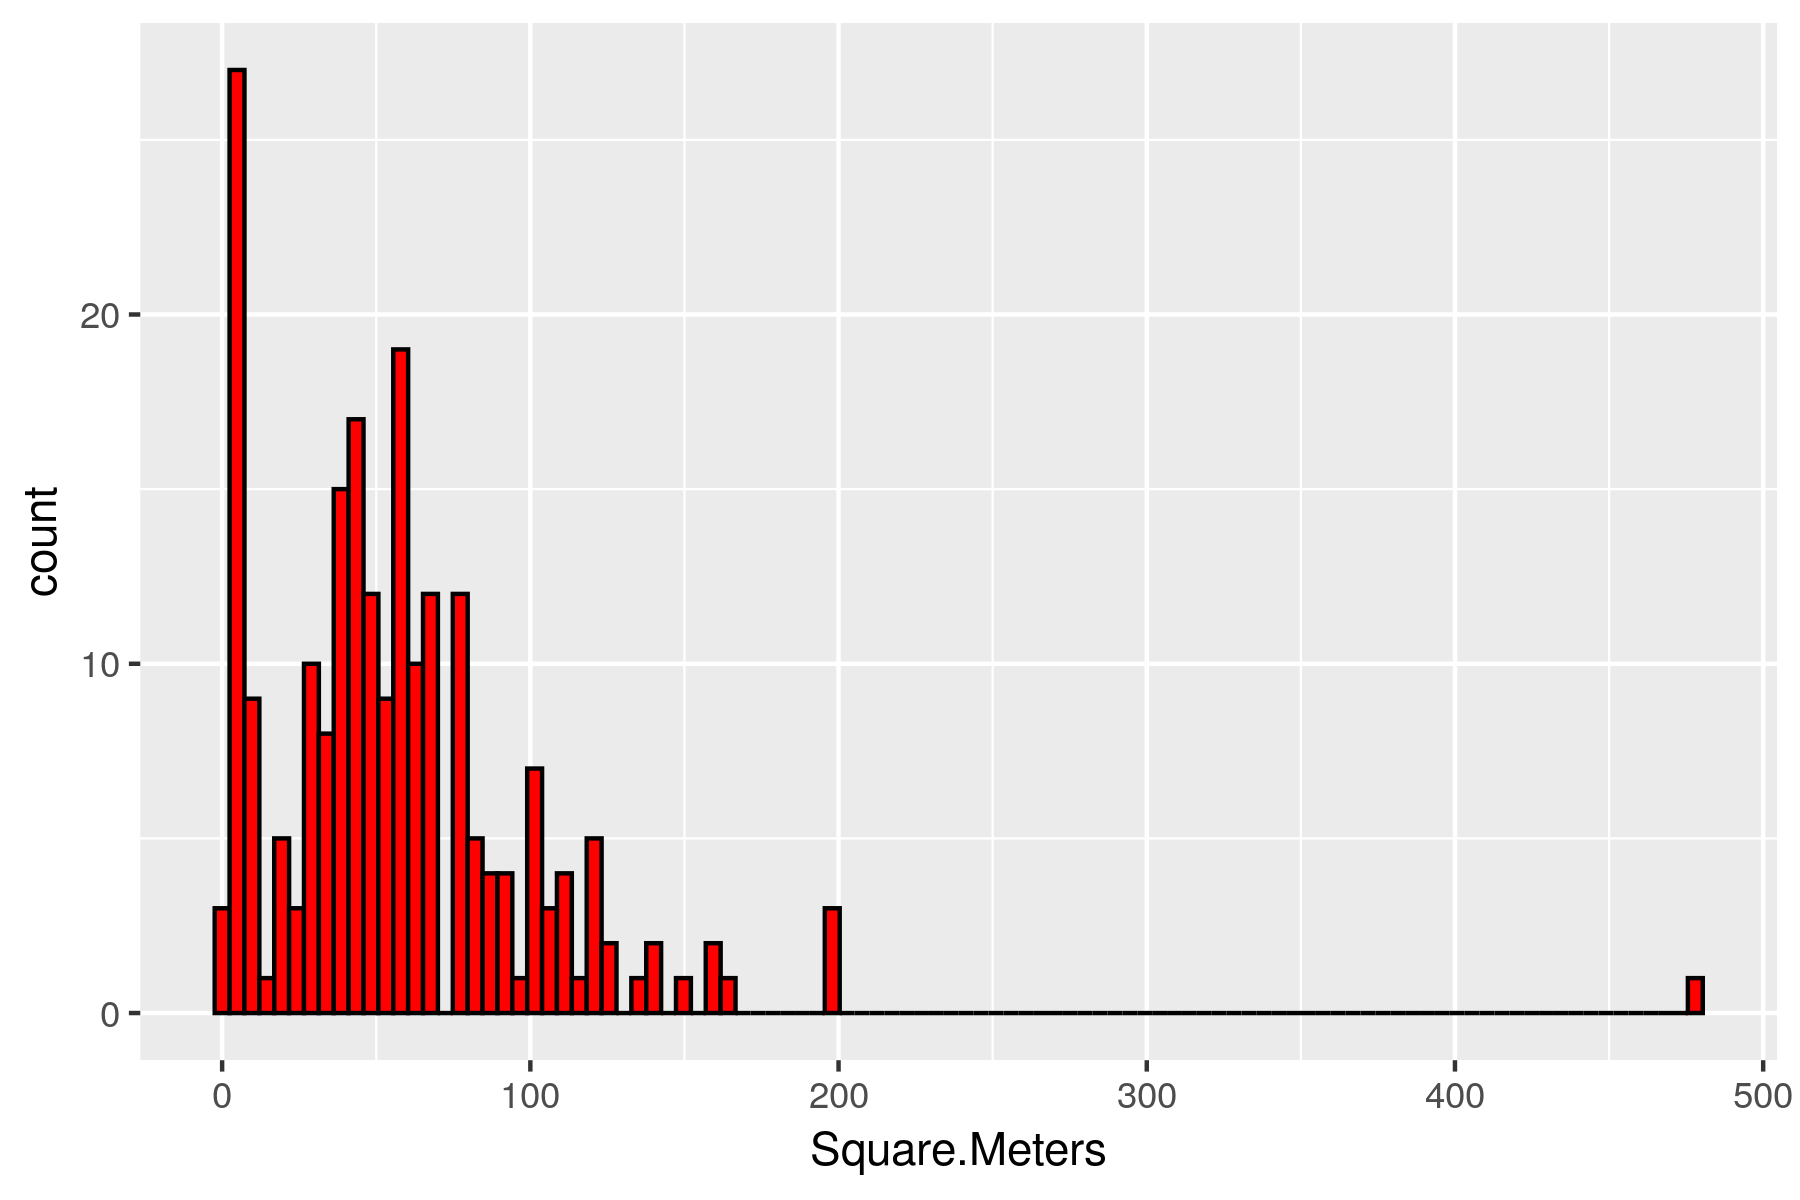

In [400]:
ggplot(df_madrid, aes(x=Square.Meters)) + geom_histogram(bins=100, col='black', fill='red')

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [401]:
df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters < 20, NA, Square.Meters))
head(df_madrid)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Guests.Included
1 Embajadores    2           1         1         2    50   1              
2 Embajadores    5           1         2         4    95   4              
3 La Latina      4           1         1         2    69   2              
4 Embajadores    4           1         1         2    57   2              
5 La Latina      2           1         1         1    59   1              
6 La Latina     14           2         3        14   120   2              
  Extra.People Review.Scores.Rating Latitude Longitude Square.Meters
1 20           93                   40.41126 -3.697305 NA           
2  0           97                   40.41256 -3.701155 NA           
3 18           91                   40.40791 -3.705095 NA           
4  8           98                   40.41162 -3.703281 NA           
5  0           95                   40.40734 -3.707019 NA           
6 18           92                   40.40908 -3.704744 NA

In [402]:
## Contamos con 65 barrios en total, eliminamos los barrios que tienen todo NA
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na = sum(is.na(Square.Meters)) / length(Square.Meters)) %>% 
  filter(num_na == 1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighb_all_na$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")

[1] "Quedan  38 barrios"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

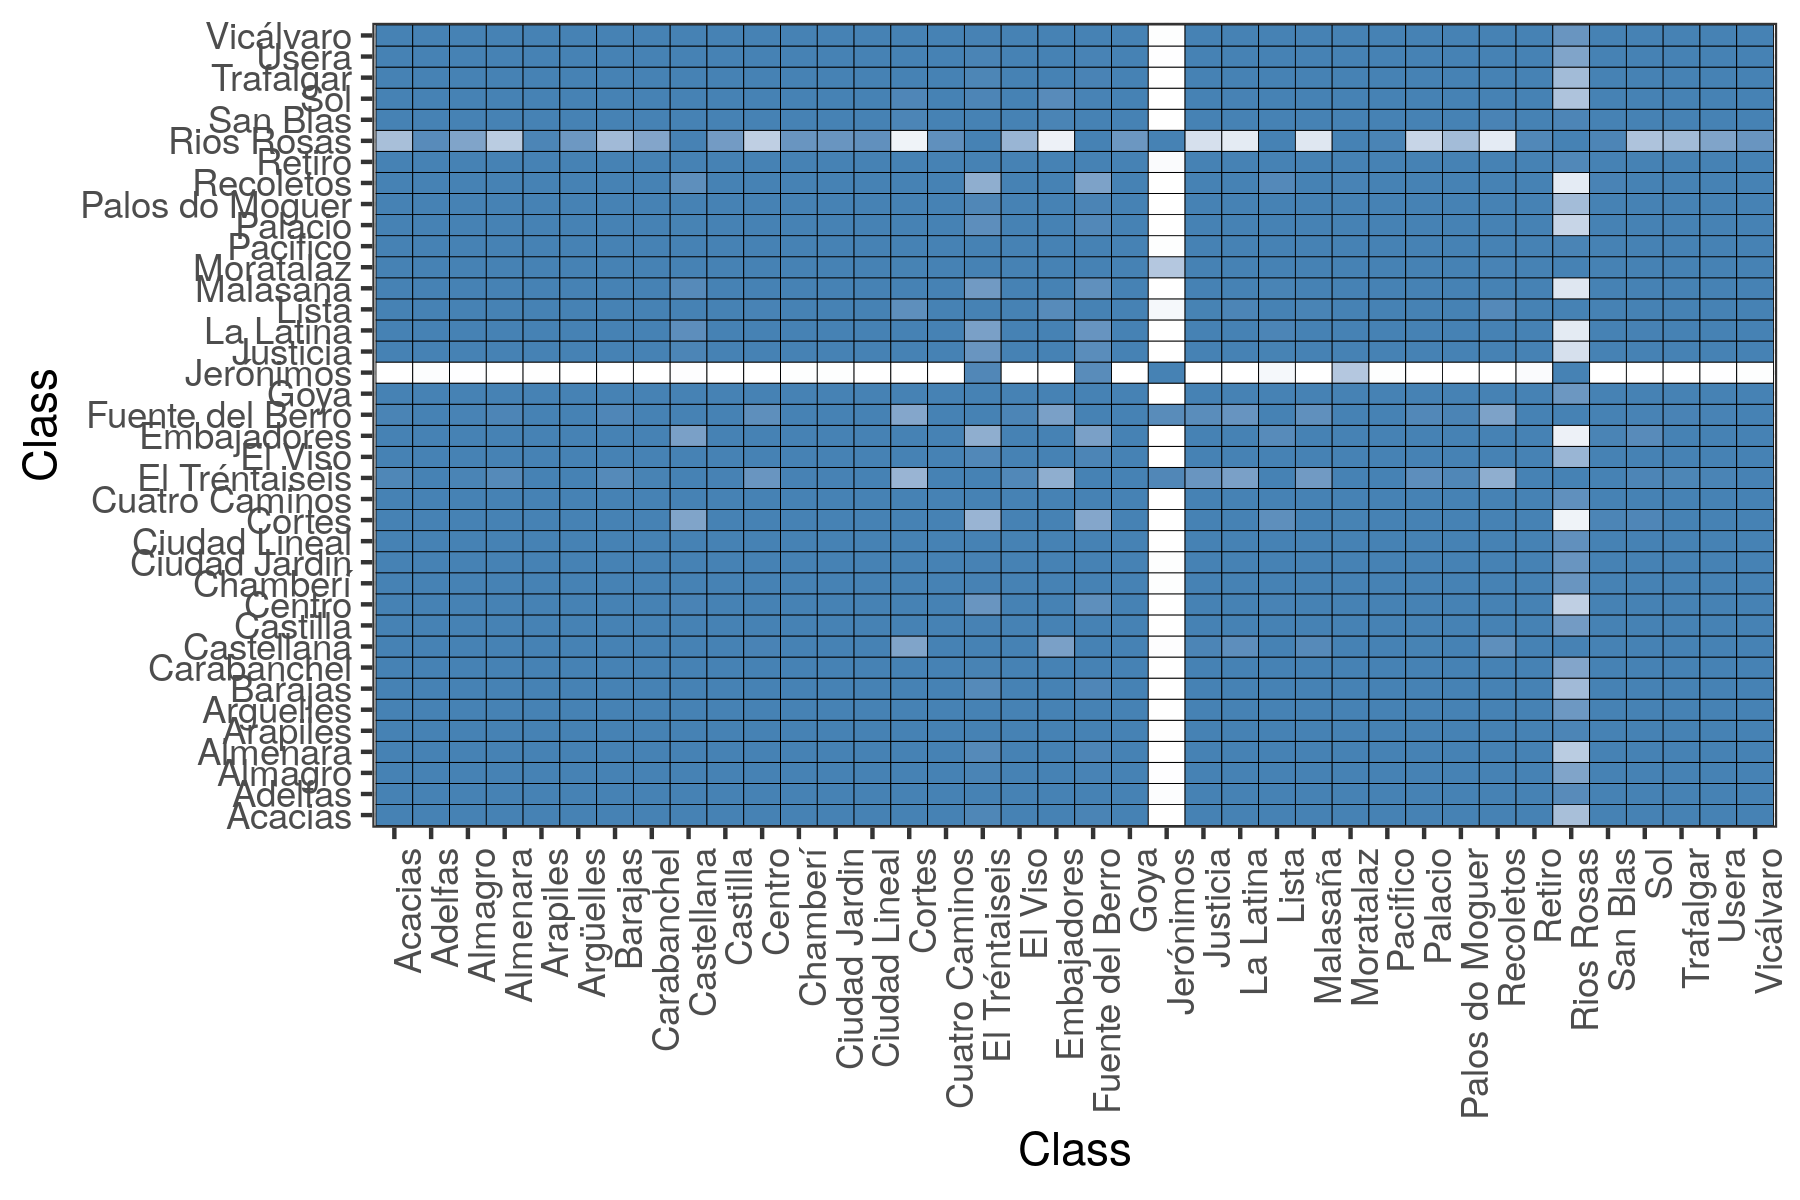

In [403]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


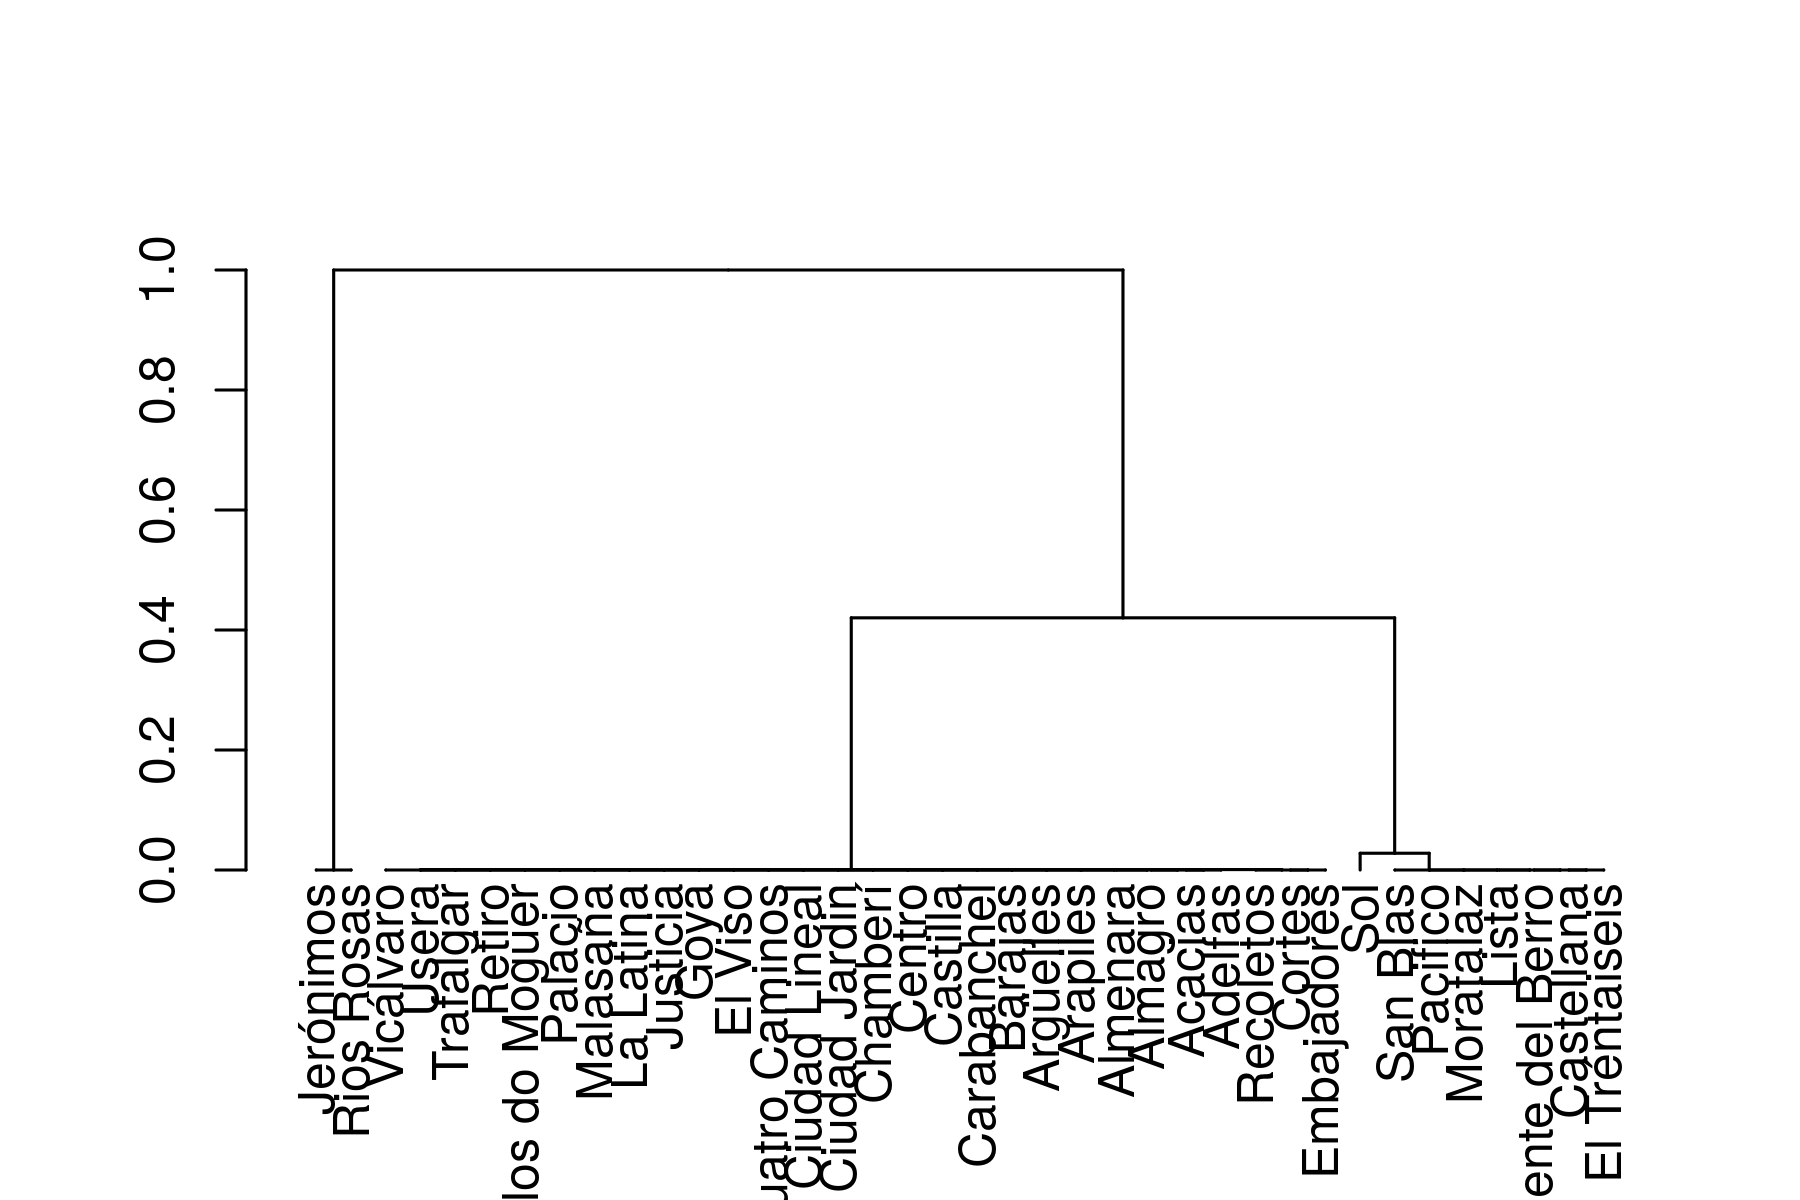

In [404]:
mDist <- as.dist(1 - resm)
hc <- hclust(mDist,method = "complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

[1] "4901  instancias tenemos para generar el modelo"

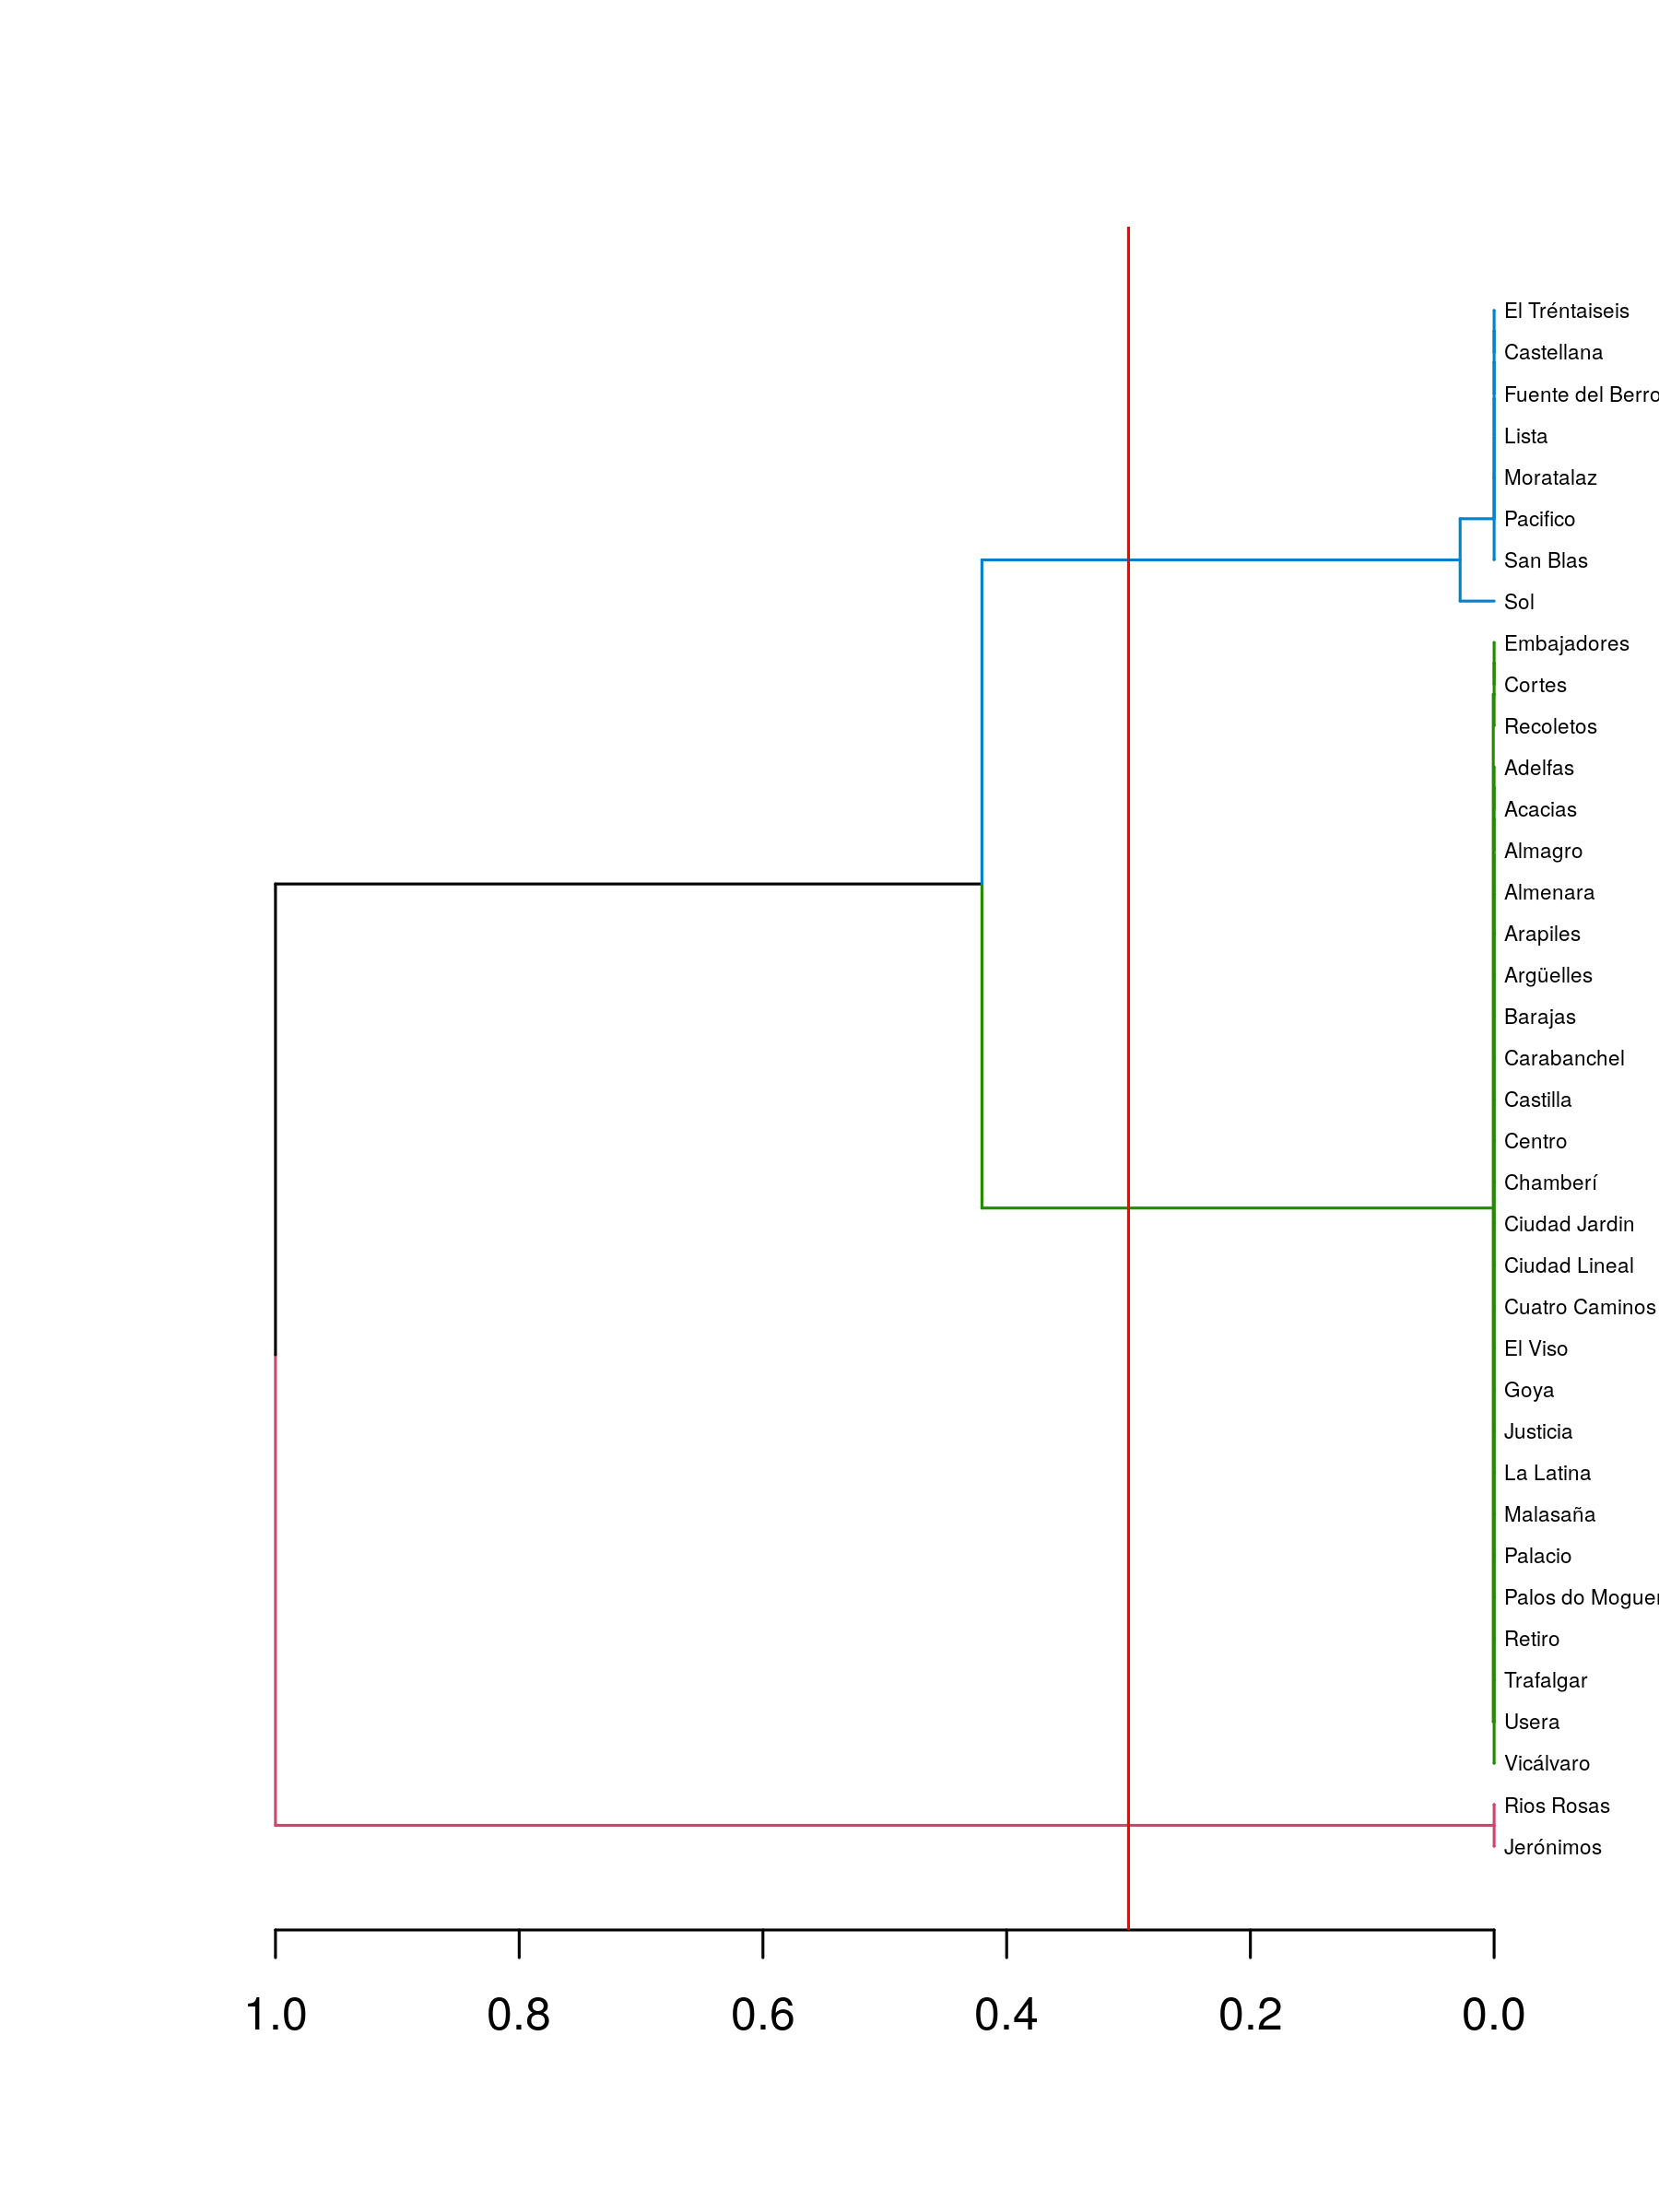

In [405]:
## Teniamos 5601 instancias antes de eliminar las que tienen todas sus columnas Na, 
## hemos eliminado 701 imnstancias mas, nos quedamos con 4901 instancias para generar el modelo.
## Al eliminar los barrios con todas la entradas Na el punto de corte es diferente, 
## en estre caso he tomado 0.3, conseguimos tres clusters y un averange de 0.91 que es bastante bueno.

paste(nrow(df_madrid),  " instancias tenemos para generar el modelo")

library(dendextend)
hcd <- as.dendrogram(hc)
hcd<-set(hcd,"labels_cex", 0.45)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
plot(color_branches(hcd,h=0.3),horiz=TRUE,cex=0)
abline(v=0.3,col="red")

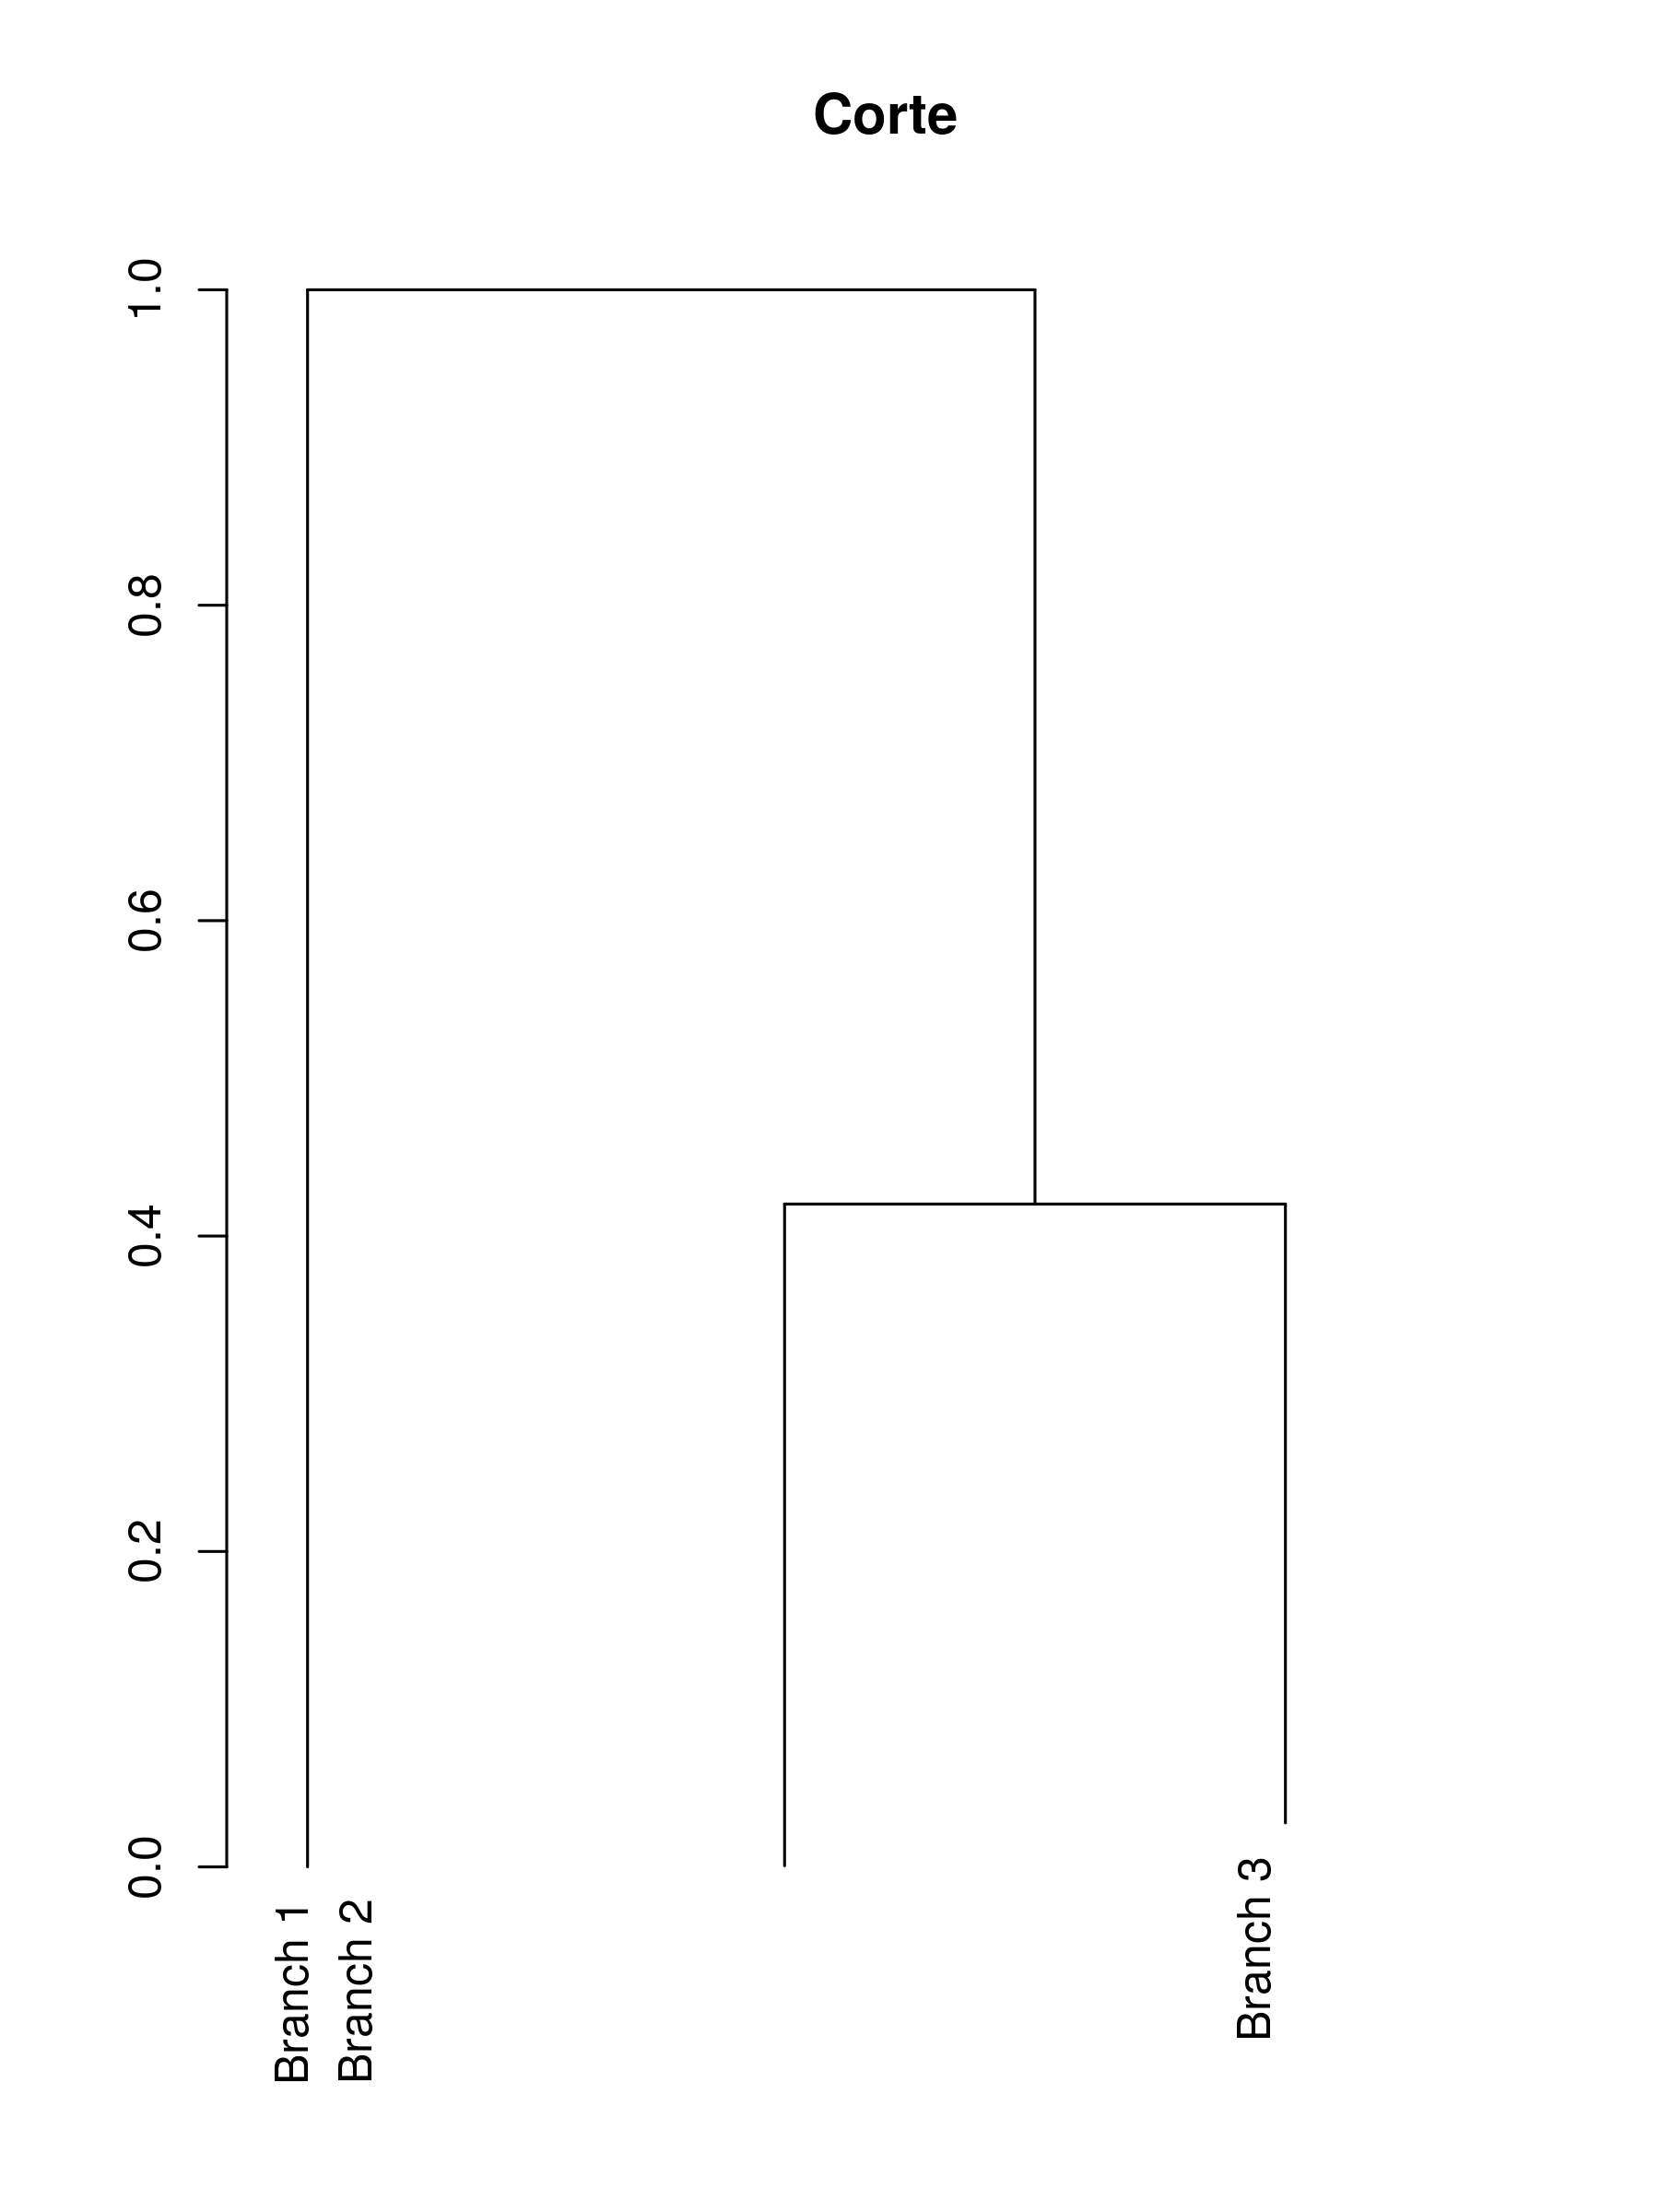

In [406]:
plot(cut(hcd, h = 0.3)$upper, main="Corte", cex=1)

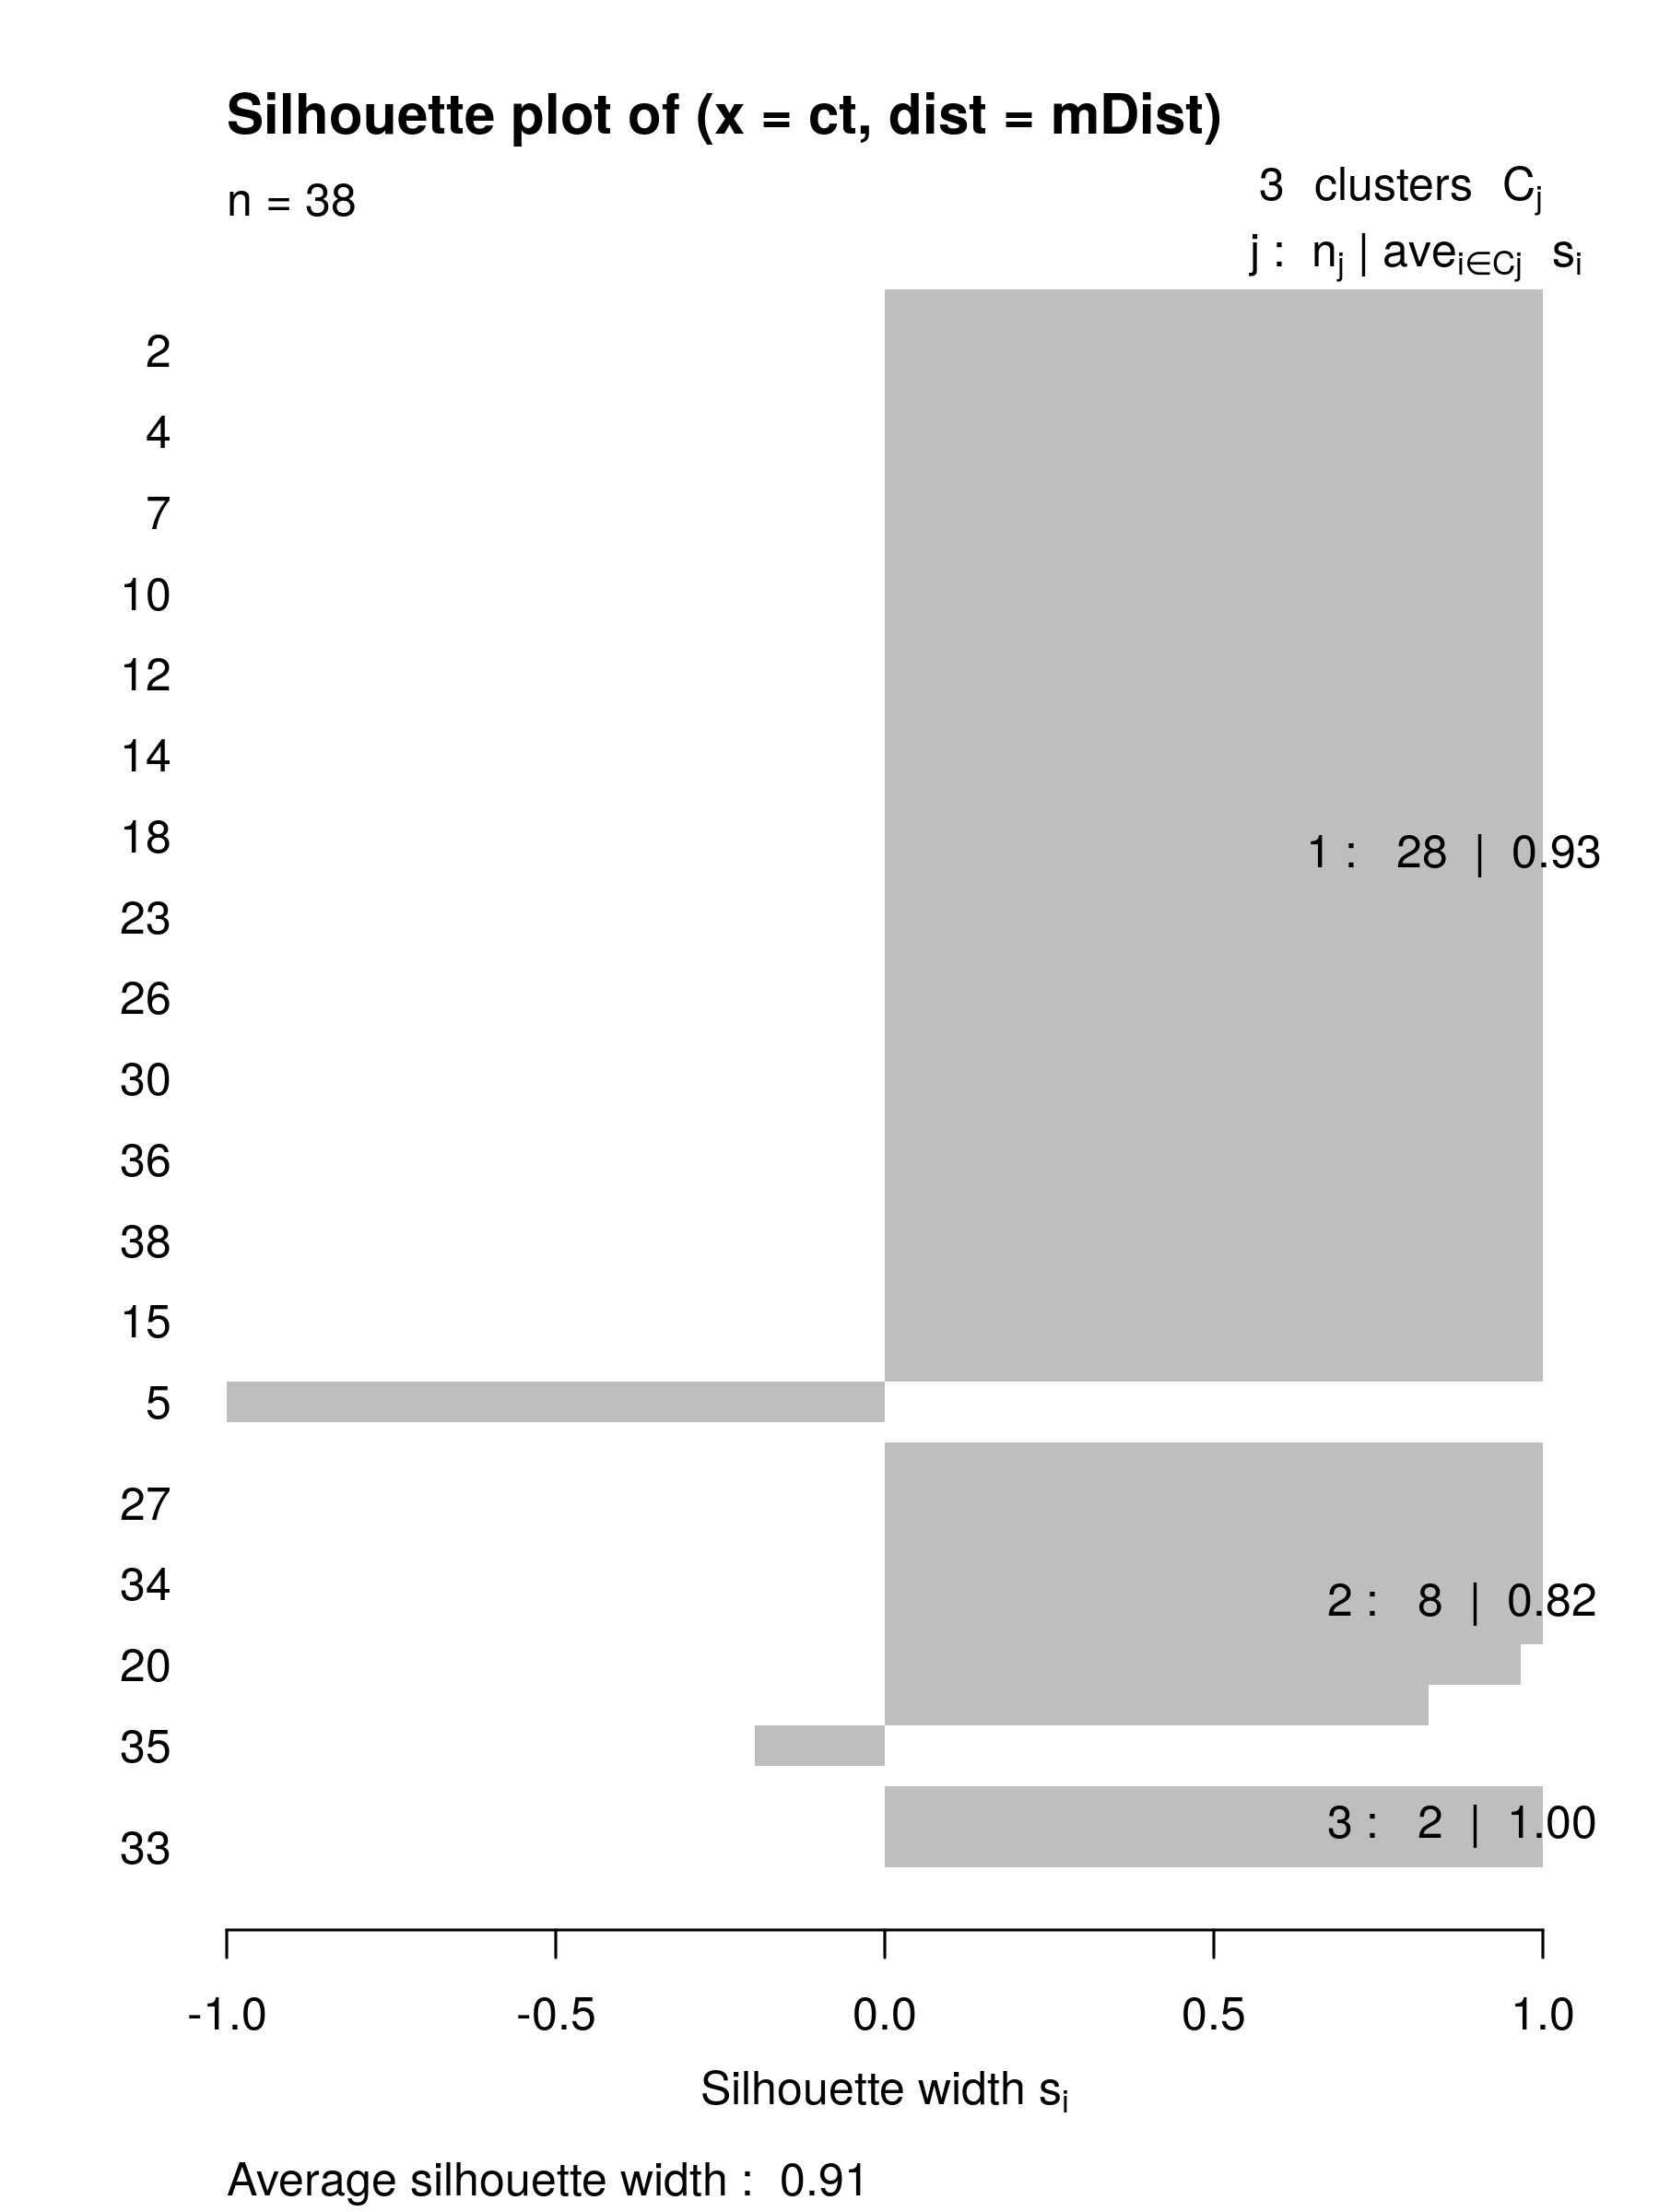

In [407]:
ct <- cutree(hc, h = 0.3)
library(cluster)
sil<-silhouette(ct,mDist)
plot(sil,border=NA)

In [408]:
ct

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                1                1 
      Castellana         Castilla           Centro         Chamberí 
               2                1                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                1                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               2                1                1                2 
            Goya        Jerónimos         Justicia        La Latina 
               1                3                1                1 
           Lista         Malasaña        Moratalaz         Pacifico 
               2                1                2                2 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               1                1                1                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                2                2                1 
           Usera        Vicálvaro 
               1                1

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [409]:
df_barrios <- data.frame(names = names(ct), neighb_id = ct)
head(df_barrios)

names     neighb_id
Acacias   Acacias   1        
Adelfas   Adelfas   1        
Almagro   Almagro   1        
Almenara  Almenara  1        
Arapiles  Arapiles  1        
Argüelles Argüelles 1

In [410]:
## Inserto la columna de los ids de los clusters
df_madrid$Neighbourhood <- factor(df_madrid$Neighbourhood)
df_madrid$neighb_id <- ct[df_madrid$Neighbourhood]

In [411]:
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 19 19 24 19 24 24 24 29 24 29 ...
 $ Accommodates        : int  2 5 4 4 2 14 2 5 4 5 ...
 $ Bathrooms           : num  1 1 1 1 1 2 1 3 1 2 ...
 $ Bedrooms            : int  1 2 1 1 1 3 1 3 1 2 ...
 $ Beds                : int  2 4 2 2 1 14 1 3 1 2 ...
 $ Price               : int  50 95 69 57 59 120 89 192 100 100 ...
 $ Guests.Included     : int  1 4 2 2 1 2 1 2 2 2 ...
 $ Extra.People        : int  20 0 18 8 0 18 10 12 12 15 ...
 $ Review.Scores.Rating: int  93 97 91 98 95 92 98 80 NA 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.7 -3.71 -3.7 -3.71 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : int  1 1 1 1 1 1 1 1 1 1 ...


In [412]:
## Convierto la columna neighb_id en factor para agrupar por cluster
df_madrid$neighb_id <-as.factor(df_madrid$neighb_id)
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 19 19 24 19 24 24 24 29 24 29 ...
 $ Accommodates        : int  2 5 4 4 2 14 2 5 4 5 ...
 $ Bathrooms           : num  1 1 1 1 1 2 1 3 1 2 ...
 $ Bedrooms            : int  1 2 1 1 1 3 1 3 1 2 ...
 $ Beds                : int  2 4 2 2 1 14 1 3 1 2 ...
 $ Price               : int  50 95 69 57 59 120 89 192 100 100 ...
 $ Guests.Included     : int  1 4 2 2 1 2 1 2 2 2 ...
 $ Extra.People        : int  20 0 18 8 0 18 10 12 12 15 ...
 $ Review.Scores.Rating: int  93 97 91 98 95 92 98 80 NA 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.7 -3.71 -3.7 -3.71 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


In [413]:
head(df_madrid)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Guests.Included
1 Embajadores    2           1         1         2    50   1              
2 Embajadores    5           1         2         4    95   4              
3 La Latina      4           1         1         2    69   2              
4 Embajadores    4           1         1         2    57   2              
5 La Latina      2           1         1         1    59   1              
6 La Latina     14           2         3        14   120   2              
  Extra.People Review.Scores.Rating Latitude Longitude Square.Meters neighb_id
1 20           93                   40.41126 -3.697305 NA            1        
2  0           97                   40.41256 -3.701155 NA            1        
3 18           91                   40.40791 -3.705095 NA            1        
4  8           98                   40.41162 -3.703281 NA            1        
5  0           95                   40.40734 -3.707019 NA            1        
6 18           92                   40.40908 -3.704744 NA            1

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [414]:
set.seed(88)
idx <- sample(1:nrow(df_madrid),0.9 * nrow(df_madrid))
train <- df_madrid[idx,]
test <- df_madrid[-idx,]


In [415]:
modelo <- lm(formula=Square.Meters~Accommodates+Price+Bedrooms, train)
summary(modelo)


Call:
lm(formula = Square.Meters ~ Accommodates + Price + Bedrooms, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.158 -12.981  -1.301  11.099 236.618 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.18026    5.74739  -0.205  0.83757    
Accommodates  7.22089    1.75324   4.119 6.30e-05 ***
Price         0.10821    0.03601   3.005  0.00312 ** 
Bedrooms     17.91233    3.73484   4.796 3.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.28 on 149 degrees of freedom
  (4257 observations deleted due to missingness)
Multiple R-squared:  0.6102,	Adjusted R-squared:  0.6024 
F-statistic: 77.75 on 3 and 149 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Warning message:
“Removed 4255 rows containing non-finite values (stat_bin).”


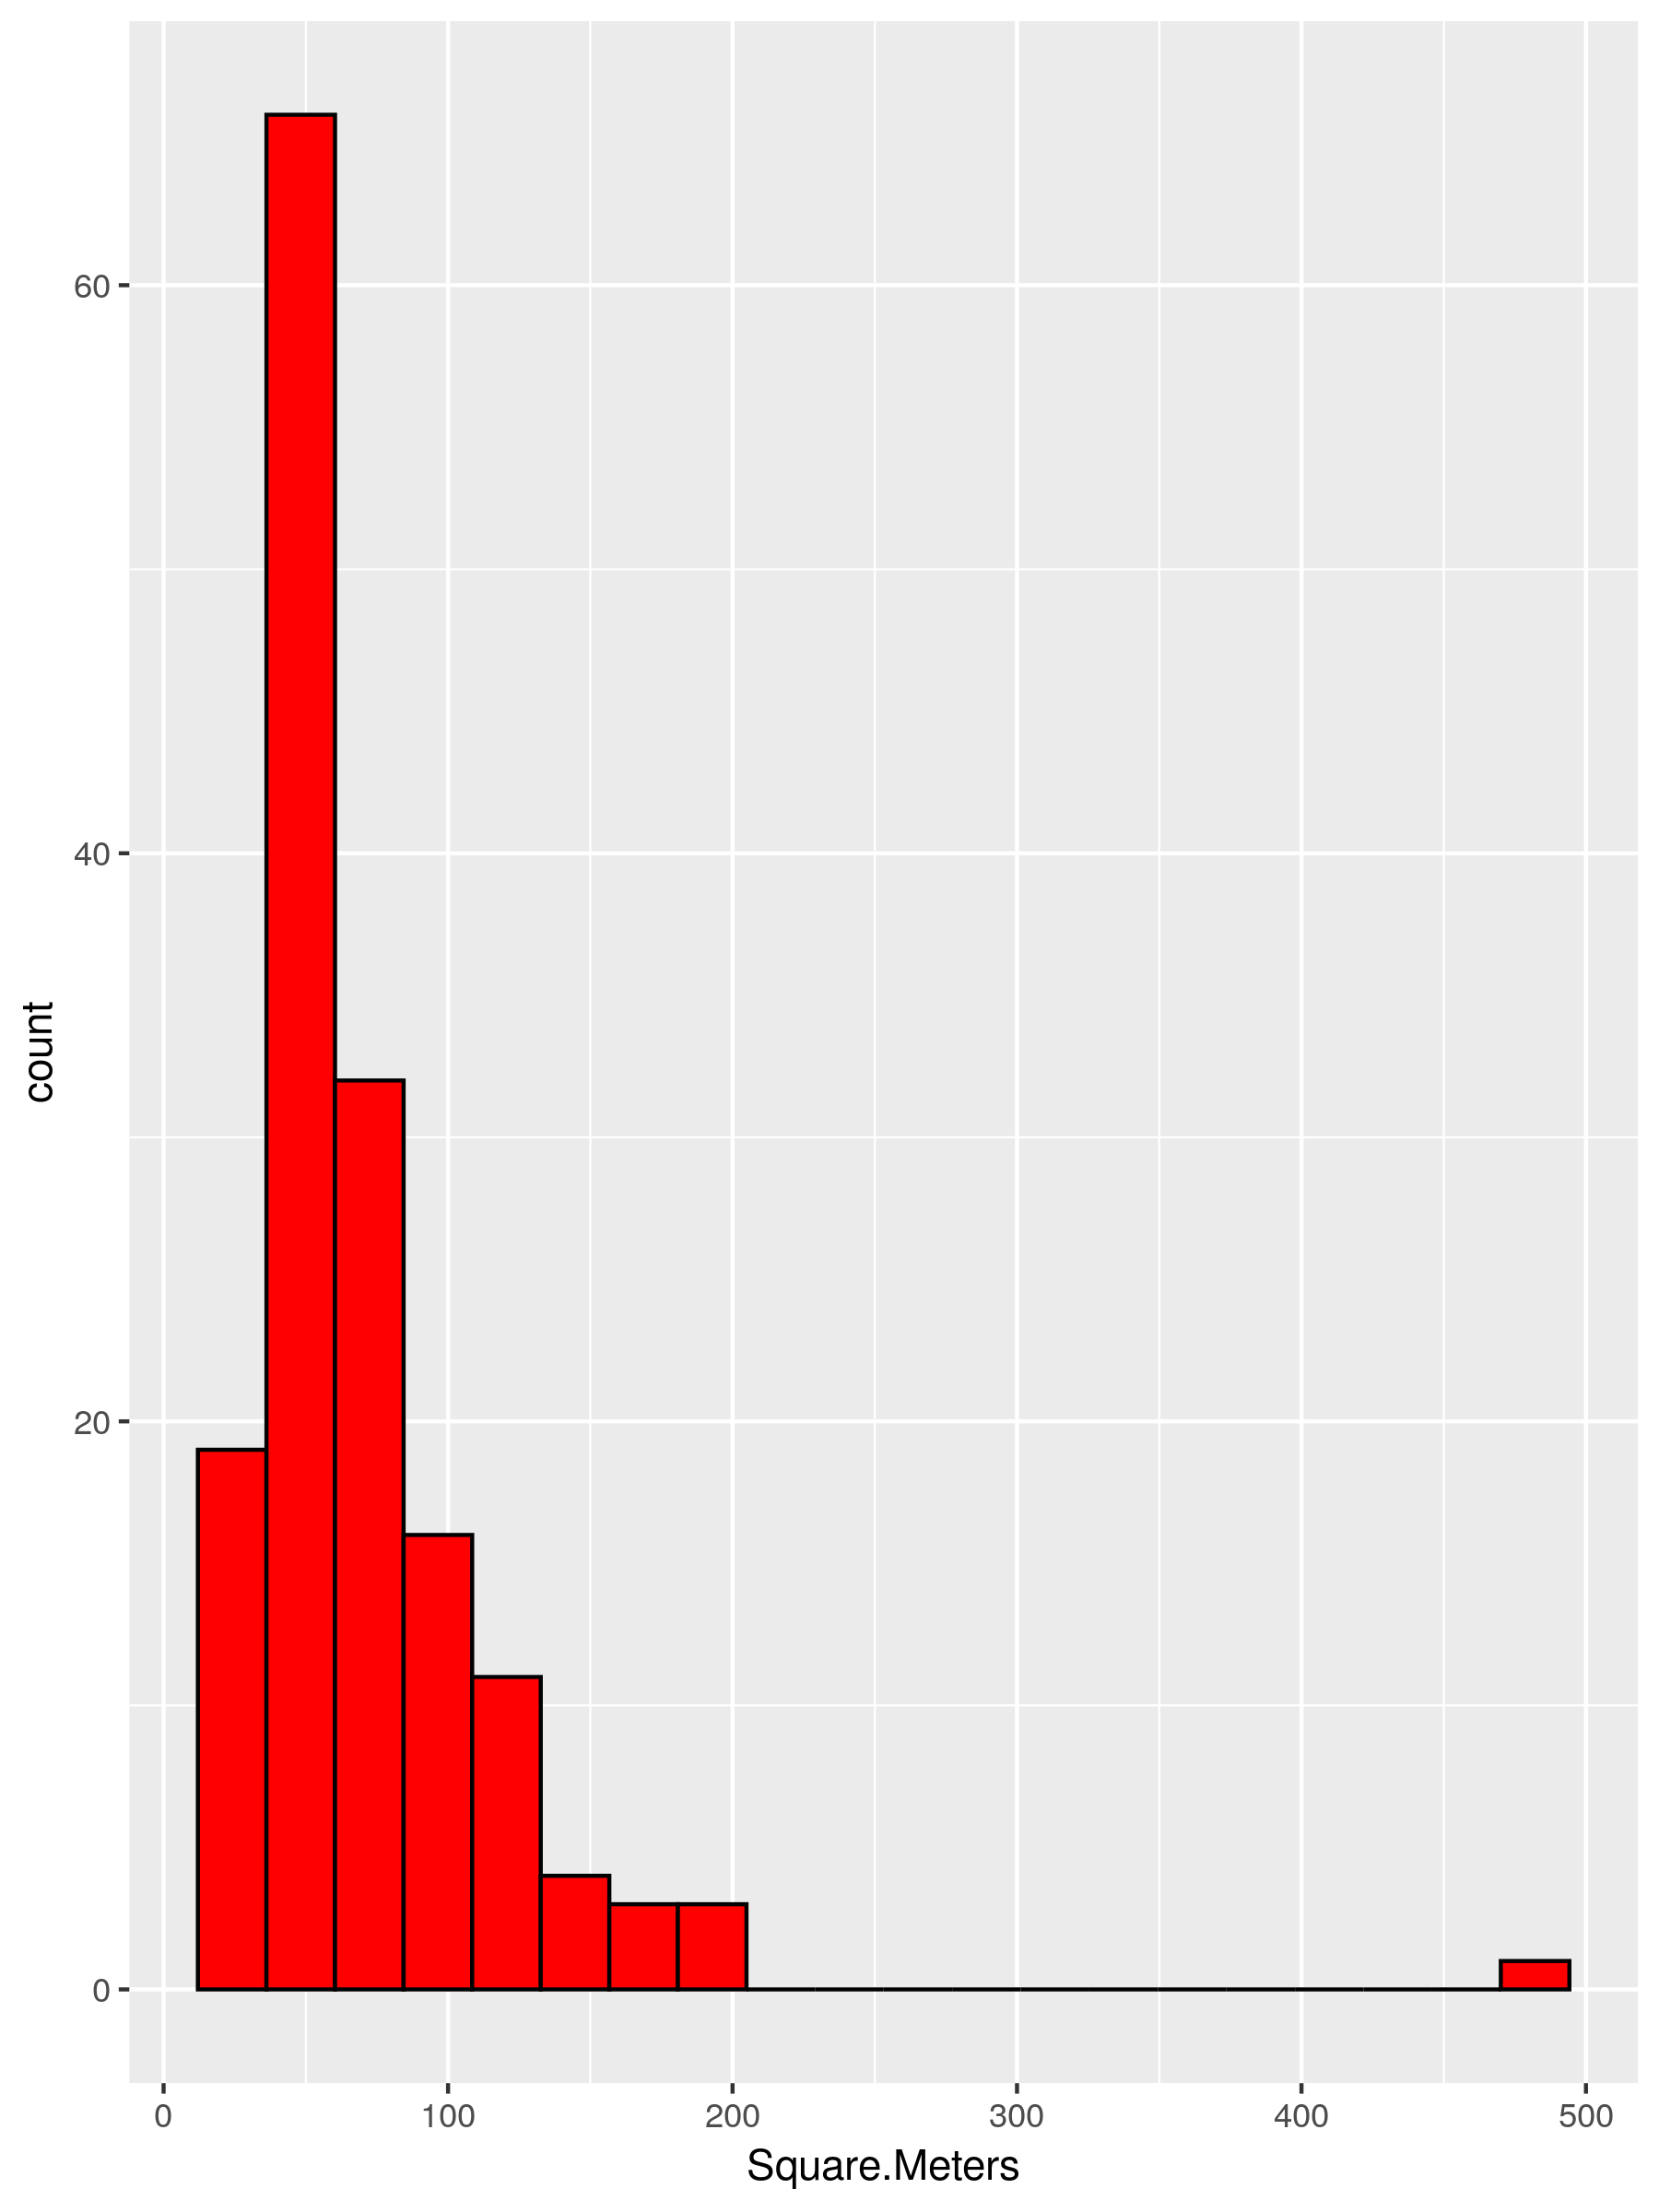

In [416]:
ggplot(train, aes(x=Square.Meters)) + geom_histogram(bins=20, col='black', fill='red')

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [548]:
apartamento <- data.frame(Neighbourhood = "Sol",Bedrooms=3, Price=80, Accommodates=6)
predicApartamentoM2 <- predict(modelo,apartamento)
paste(round(predicApartamentoM2), "Metros cuadrados")

[1] "105 Metros cuadrados"

In [549]:
paste("Por cada habitación adicional varía ")
coef_metros <- summary(modelo)$coefficients
round(coef_metros ["Bedrooms", "Estimate"])
paste("Metros")

[1] "Por cada habitación adicional varía "

[1] 18

[1] "Metros"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

## Este codigo lo he sacado de internet, pero me surge la duda, ¿por que en el summary me sigue apareciendo 12 NA`s, si estoy reemplazando todos por el estimaado anterior? Debería sustituir los valores en la  misma Square.Meters pero lo que hace es crear una nueva y la otra la sustituye.

##RellenarNAestimadoAnterior <- function(x) {
    
    if(is.na(x["Square.Meters"])){
        if(is.na(x["RellenarNAestimadoAnterior"])){
            return(NA)
        }
        return(as.numeric(x["RellenarNAestimadoAnterior"]))
    }
    return(as.numeric(x["Square.Meters"]))
}

df_madrid$RellenarNAestimadoAnterior <- predict.lm(modelo, type="response", newdata=df_madrid)
df_madrid$Square.Meters <- apply(df_madrid,1,RellenarNAestimadoAnterior)

summary(df_madrid)

In [423]:
## Probando tú código si sutituye los valores en la columna Square.Meters pero
## me crea dos columnas nuevas que no se por que neighb_id.x y neighb_id.y

df_madrid <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)]<-
 round(predict(modelo,df_madrid[is.na(df_madrid$Square.Meters),]))

summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 1.954   Mean   :  9.019  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :80

In [ ]:
## En conclusión, mi modelo con un error del 30% no puedo decir que sea muy fiable, 
## necesitaria mas instancias y elejir otra combinación de variables.

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [520]:
## Eliminamos los NA´s
df_madrid_pca<-na.omit(df_madrid[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude",
                                           "Beds","Price","Review.Scores.Rating","Square.Meters",'neighb_id.x','neighb_id.y')])

In [521]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters    neighb_id.x  nei

In [434]:
## Eliminamos las columnas neighb_id.x y neighb_id.y ya que no necesitamos,
## la introducimos en dataset para hacer el clusster
## df_madrid_pca$neighb_id.x <- NULL
## df_madrid_pca$neighb_id.y <- NULL


In [435]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters   
 Min.   : 10.00 

In [481]:
pcaMatrix = data.matrix(df_madrid_pca)
pcaMatrix[sample(1:nrow(pcaMatrix),5),1:9]

Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
2385 2            1         1        40.42825 -3.709126 1     50  
1804 6            2         4        40.43731 -3.692725 4    185  
2695 4            1         1        40.41160 -3.710195 2     50  
2051 1            1         1        40.42931 -3.694838 1     55  
1700 4            2         1        40.41454 -3.700178 2     98  
     Review.Scores.Rating Square.Meters
2385 100                   37          
1804  91                  134          
2695  93                   51          
2051  93                   30          
1700  80                   56

In [482]:
pca <- prcomp(df_madrid_pca,center = TRUE, scale. = TRUE)

In [522]:
pca <- prcomp(df_madrid_pca %>% select(-neighb_id.x, -neighb_id.y),center = TRUE, scale. = TRUE)

In [523]:
str(pca)

List of 5
 $ sdev    : num [1:9] 2.134 1.172 1.006 0.819 0.764 ...
 $ rotation: num [1:9, 1:9] 0.4232 0.3678 0.4203 0.0194 0.0386 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 4.13 1.24 1.42 40.42 -3.7 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ scale   : Named num [1:9] 1.9002 0.5035 0.9462 0.0117 0.0149 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ x       : num [1:4187, 1:9] -1.549 1.008 -0.789 -0.849 -1.767 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4187] "1" "2" "3" "4" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [524]:
## Matriz de autovalores
pca$sdev[1:9]

[1] 2.1342197 1.1716557 1.0064896 0.8192873 0.7637845 0.5766432 0.5378690
[8] 0.4028925 0.1434100

In [525]:
pcaSummary <- summary(pca)
pcaSummary
paste("En PC3 tenemos mas del 75% de la información y en PC5 el 91%")

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1342 1.1717 1.0065 0.81929 0.76378 0.57664 0.53787
Proportion of Variance 0.5061 0.1525 0.1126 0.07458 0.06482 0.03695 0.03214
Cumulative Proportion  0.5061 0.6586 0.7712 0.84577 0.91059 0.94753 0.97968
                           PC8     PC9
Standard deviation     0.40289 0.14341
Proportion of Variance 0.01804 0.00229
Cumulative Proportion  0.99771 1.00000

[1] "En PC3 tenemos mas del 75% de la información y en PC5 el 91%"

In [526]:
pca$x[1,1:9]

PC1         PC2         PC3         PC4         PC5         PC6 
-1.54869641 -0.28391393  0.23499210  0.52497644 -0.34096671 -0.11979686 
        PC7         PC8         PC9 
-0.05385787  0.60755545 -0.03110575

In [527]:
pic<-(pcaMatrix %*% t(pca$rotation))*pca$scale+pca$center
summary(array(pic))
#Debido a errores de redondeo
pic[pic<0]<-0
pic[pic>1]<-1
dim(pic)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-14872.162    -18.216      5.967     71.581     48.820  19229.184 

[1] 4187    9

In [528]:
apartamento <- pcaApartamentos %*% t(pca$rotation)
summary(array(apartamento))
pic <- (apartamento - min(apartamento))
pic <- apartamento / max(apartamento)
apartamento

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.73290 -0.43455 -0.41418 -0.41564 -0.36184  0.07449 

Accommodates Bathrooms  Bedrooms   Latitude   Longitude  Beds      
[1,] -0.3618391   -0.4156697 -0.4141796 -0.7253773 -0.7329023 -0.3594328
     Price      Review.Scores.Rating Square.Meters
[1,] -0.3712858 0.07448662           -0.4345517

In [536]:
paste("Una media de apartamento sería este. No lo pide el ejercicio pero puede ser una opción de busqueda.")
apartamentoMedio <- colSums(pcaMatrix) / nrow(pcaMatrix)
round(mean_appartment)

[1] "Una media de apartamento sería este. No lo pide el ejercicio pero puede ser una opción de busqueda."

Accommodates            Bathrooms             Bedrooms 
                   4                    1                    1 
            Latitude            Longitude                 Beds 
                  40                   -4                    2 
               Price Review.Scores.Rating        Square.Meters 
                  87                   91                   63

In [540]:
funcionApartamento <- function(pca, new_flat,num_flats){
    pca_new <- predict(pca,newdata = new_vector)
    pca_orig <- pca$x[,1:2]
    pca_new <- pca_new[,1:2]

    idx <- order(rowSums((pca_new - pca_orig)^2))
    df_madrid_pca[idx %in% 1:num_flats,]
}

In [546]:
## He adaptado tu función a mi código por que no encontraba la forma de hacerla, 
## al pricipio decidí eliminar las columnas neighb_id.x, neighb_id.y ya que nos servian para el cluster, 
## pero no conseguia adaptar tu funcion a esa decisión, al pasarle a la funcion apartamentoMedio lo que hago es 
## buscar los los 5 apartamentos similares a apartamentoMedio.
## Creo no que me ha quedado del todo claro si he hecho bien PCA, pero lo que queria buscar es lo que comentaba antes.
## En el ejemplo de las fotos si he entendido el proceso y su función.

## selecColDataset <- (df_madrid_pca %>% select(-neighb_id.x, -neighb_id.y))[9,]
## selecColDataset
funcionApartamento(pca,apartamentoMedio,5)

Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
2078 3            1         1        40.41180 -3.708933 2     66  
2358 3            1         0        40.41433 -3.711524 2     60  
2713 6            2         2        40.42315 -3.701055 4    130  
3570 4            1         1        40.42127 -3.690631 1     95  
3949 4            1         0        40.40951 -3.701476 2     50  
     Review.Scores.Rating Square.Meters neighb_id.x neighb_id.y
2078  96                  46            1           1          
2358  91                  27            1           1          
2713  99                  92            1           1          
3570 100                  56            1           1          
3949  89                  33            1           1

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?